In [9]:
%matplotlib inline

In [10]:
# This is a good notebook to start with when tackling new problems.
# Tests several methods in thresholding and filtering to identify best options

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import pylab

# Change path to your images folder
img_path = 'C://Users/tzlab/Anaconda/'
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

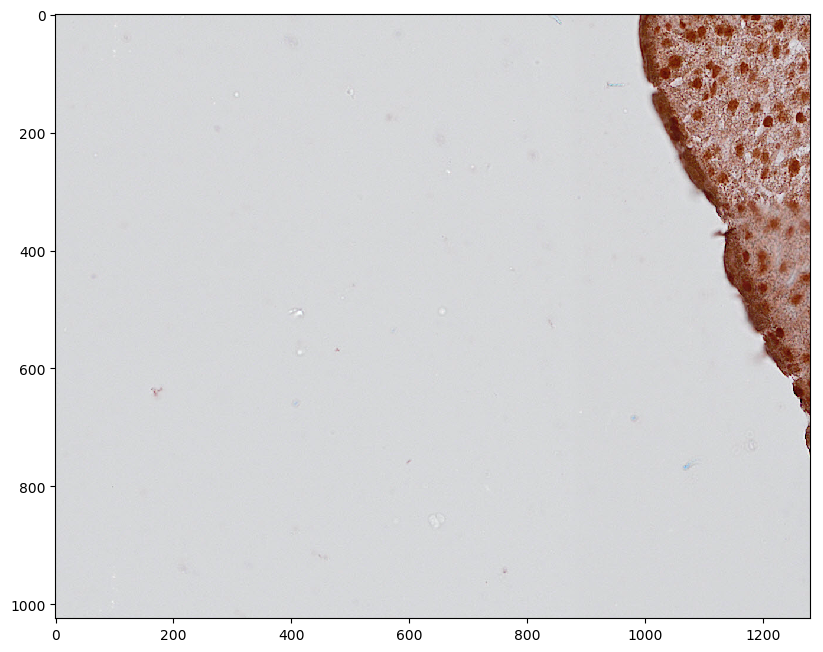

In [12]:
img = cv2.imread(img_path+"/Images/GImage.tif")
plt.imshow(img)
plt.show()

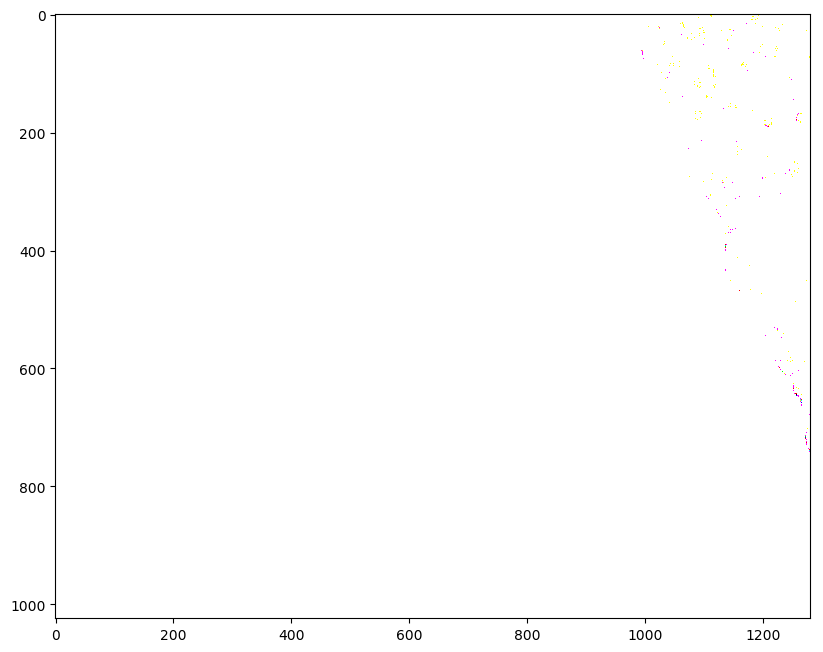

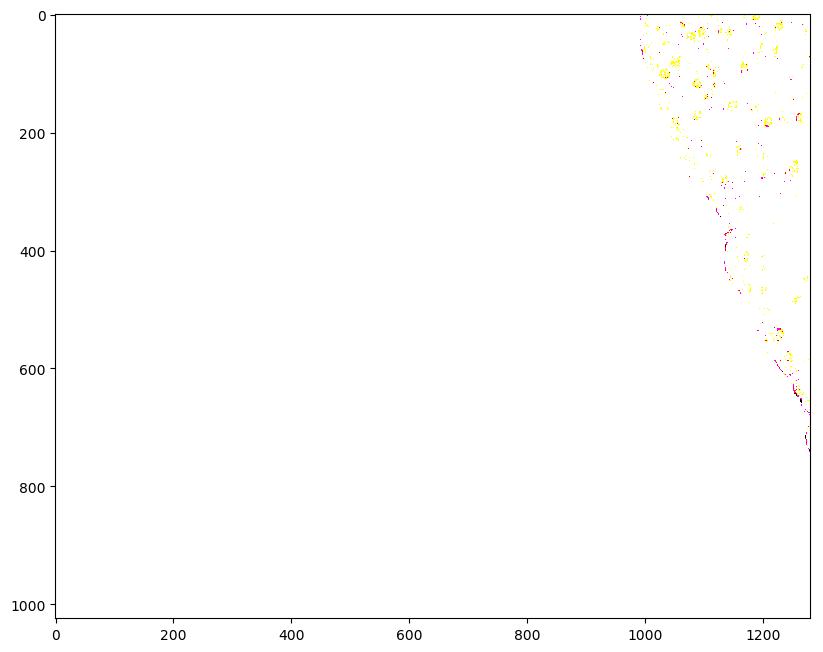

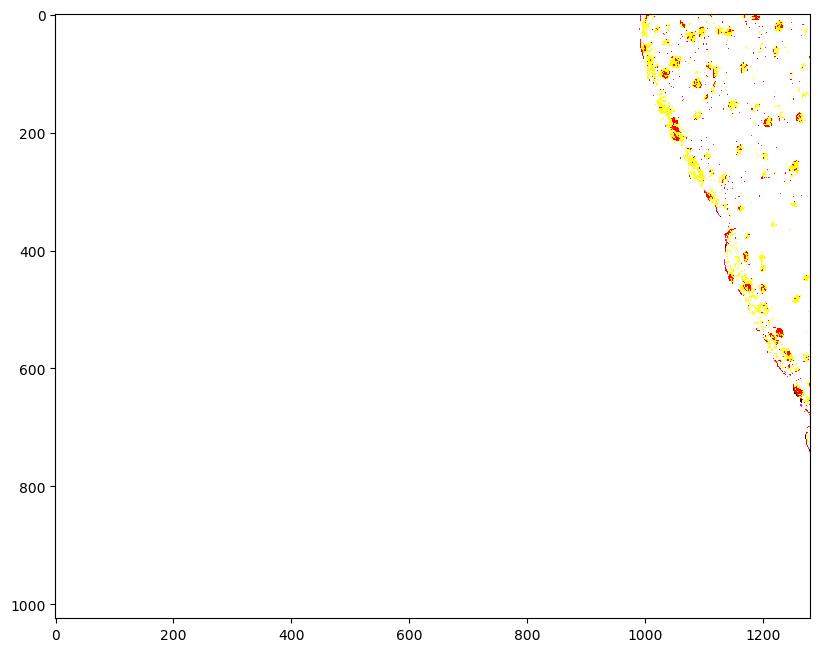

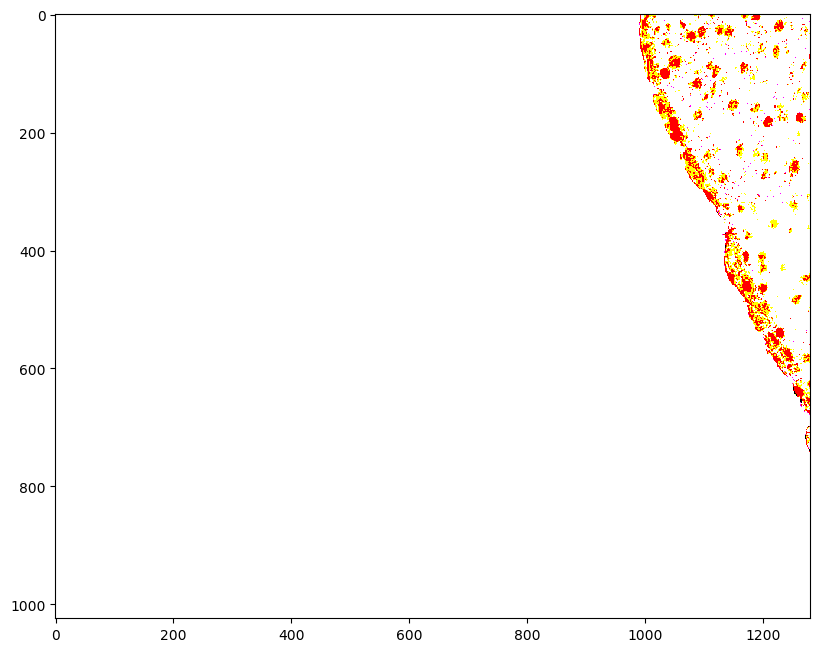

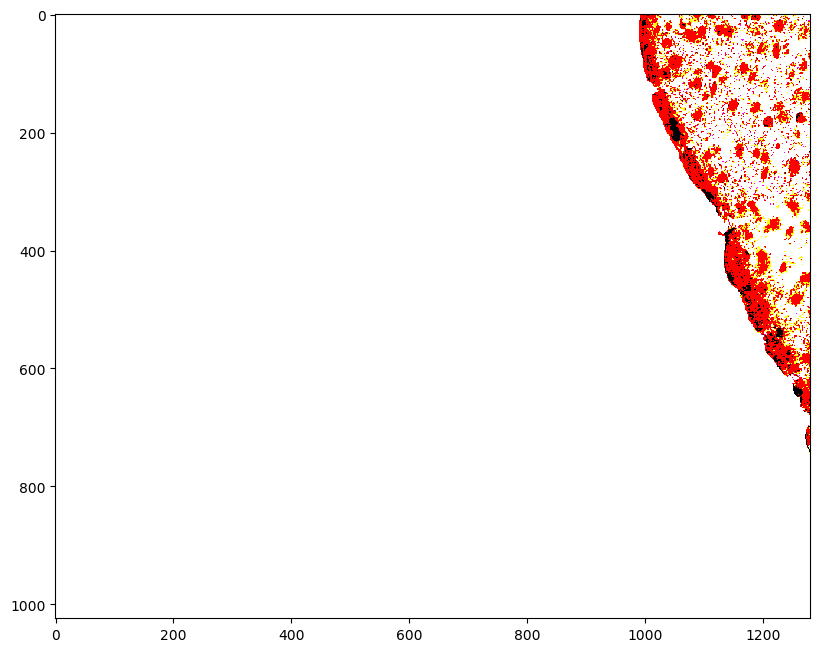

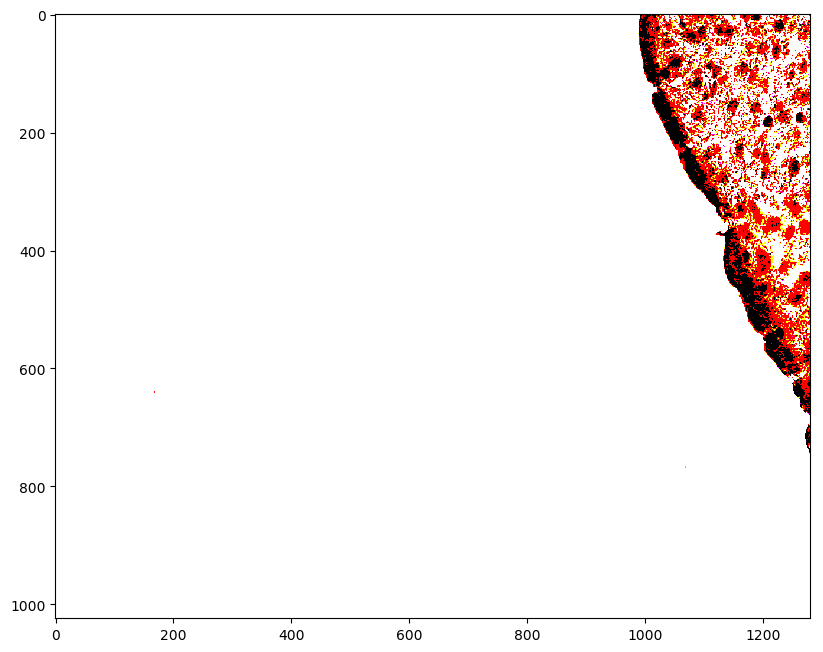

In [13]:
#Test Thresholding

# Transform to binary where values between min and max are white
_, t0 = cv2.threshold(img, 1, 255, cv2.THRESH_BINARY)
plt.imshow(t0)
plt.show()

_, t1 = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY)
plt.imshow(t1)
plt.show()

_, t2 = cv2.threshold(img, 25, 255, cv2.THRESH_BINARY)
plt.imshow(t2)
plt.show()

_, t3 = cv2.threshold(img, 50, 255, cv2.THRESH_BINARY)
plt.imshow(t3)
plt.show()

_, t4 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
plt.imshow(t4)
plt.show()

_, t5 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
plt.imshow(t5)
plt.show()

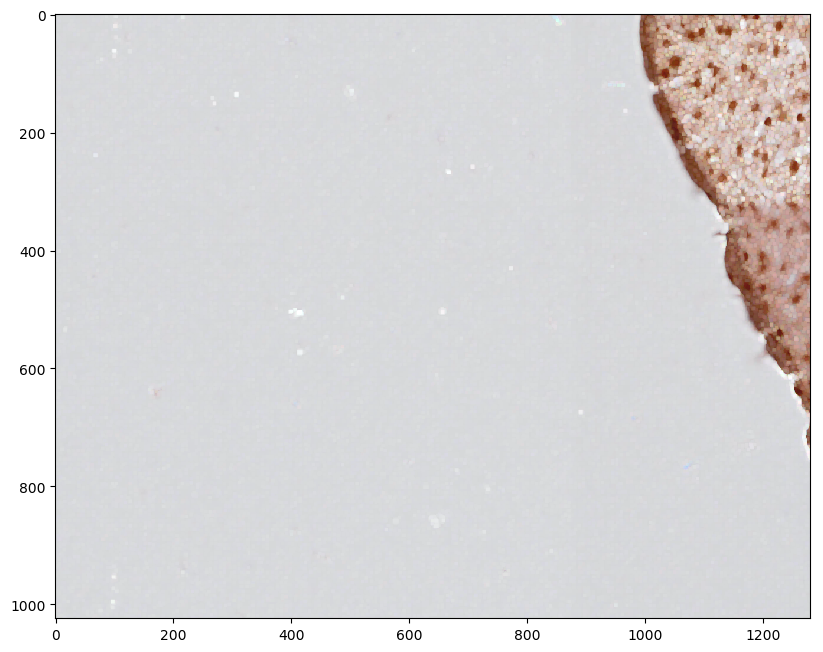

In [7]:
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(img, kernel, iterations=1)
plt.imshow(dilation)
plt.show()

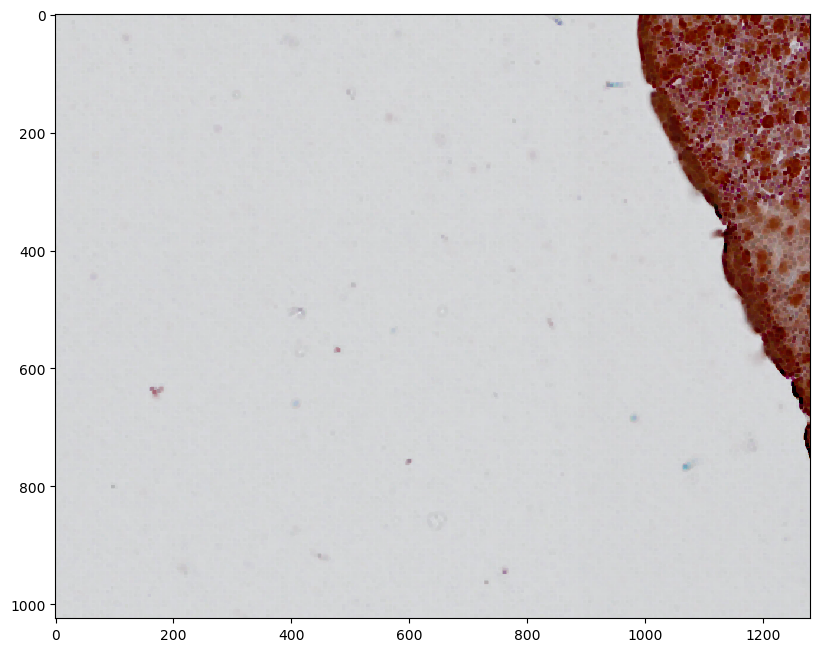

In [8]:
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(img, kernel, iterations=1)
plt.imshow(erosion)
plt.show()

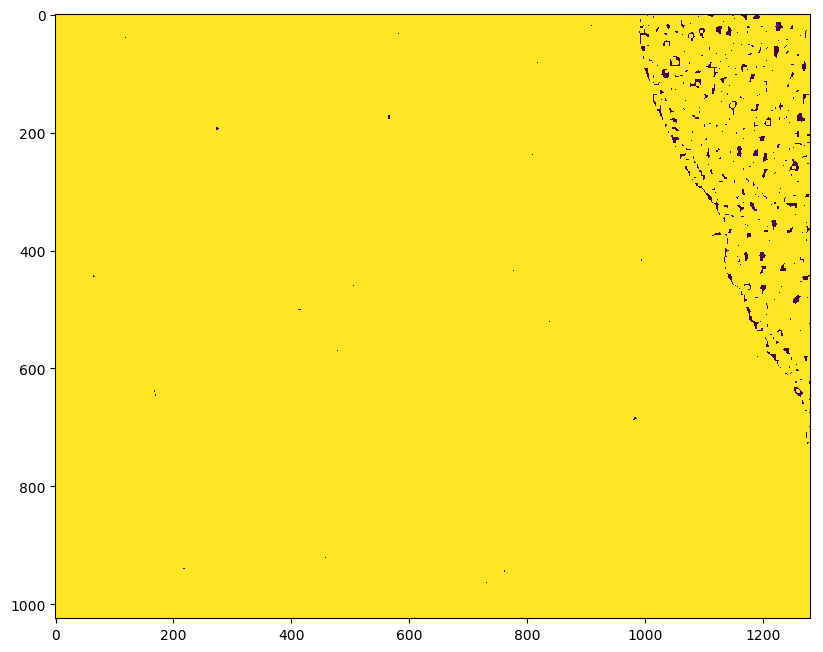

In [9]:
blurred = cv2.GaussianBlur(img,(5,5),5)
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
kernel = np.ones((5,5), np.uint8)

bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
dilation = cv2.dilate(bw, kernel)

plt.imshow(dilation)
plt.show()

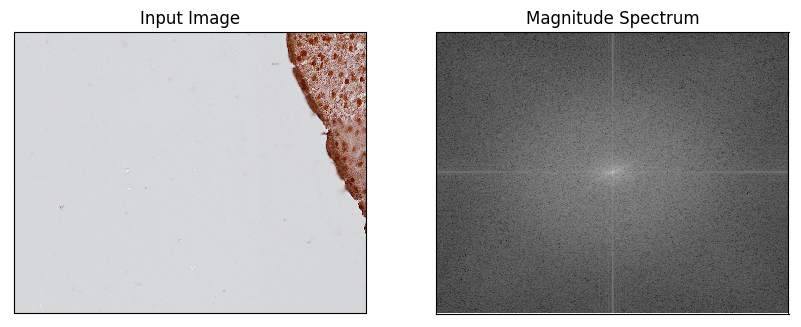

In [10]:
#http://opencv-python-tutroals.readthedocs.org/en/latest/py_tutorials/py_imgproc/
#py_transforms/py_fourier_transform/py_fourier_transform.html#fourier-transform

#Function tests fourier transform
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
dft = cv2.dft(np.float32(gray), flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_s = 20*np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_s, cmap='gray')
plt.title("Magnitude Spectrum"), plt.xticks([]), plt.yticks([])
plt.show()

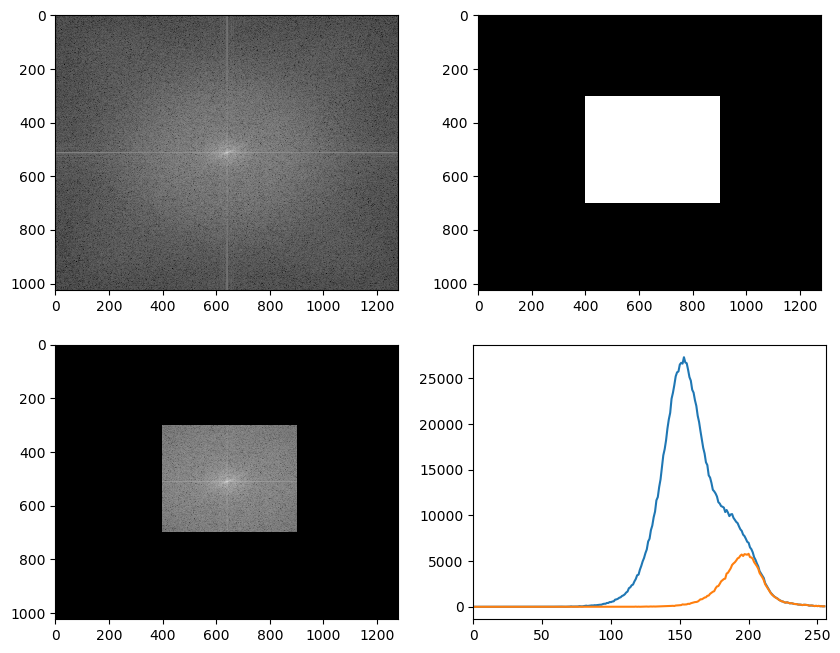

In [11]:
#Function tests Fourier and histograms

im = magnitude_s
mask = np.zeros(im.shape, np.uint8)
mask[300:700,400:900] = 255
masked_img = cv2.bitwise_and(im, im, mask = mask)

hist_full = cv2.calcHist([im], [0], None, [256], [0,256])
hist_mask = cv2.calcHist([im], [0], mask, [256], [0,256])

plt.subplot(221), plt.imshow(im, 'gray')
plt.subplot(222), plt.imshow(mask, 'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])
plt.show()

In [12]:
print "Variance of Laplacian:",(cv2.Laplacian(img, cv2.CV_64F).var())

Variance of Laplacian: 171.889003316


In [13]:
print "Mean of image:", np.mean(img)
print "Std Dev of image:", np.std(img)
print "Median of image:", np.median(img)


Mean of image: 206.754034678
Std Dev of image: 30.1839531878
Median of image: 215.0


In [14]:
def Test(image):
    # Original Hough
    padded = cv2.copyMakeBorder(image, 102, 102, 128, 128, cv2.BORDER_CONSTANT, 255)
    mask = np.zeros(padded.shape, np.uint8)
    circles = cv2.HoughCircles(padded, cv2.cv.CV_HOUGH_GRADIENT, 1, 100, param1 = 60, param2 = 40, minRadius = 0, maxRadius = 0)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x,y,r) in circles:
            cv2.circle(mask, (x,y), r, (255,255,255), -1)
    mask = mask[102:204, 128:256]
    One = cv2.bitwise_and(image, image, mask=mask)
    
    #Otsu Threshold
    ret2,th2 = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    padded = cv2.copyMakeBorder(th2, 102, 102, 128, 128, cv2.BORDER_CONSTANT, 255)
    mask = np.zeros(padded.shape, np.uint8)
    circles = cv2.HoughCircles(padded, cv2.cv.CV_HOUGH_GRADIENT, 1, 100, param1 =30, param2 = 10, minRadius = 0, maxRadius = 0)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x,y,r) in circles:
            cv2.circle(mask, (x,y), r, (255,255,255), -1)
    mask = mask[102:204, 128:256]
    Two = cv2.bitwise_and(image, image, mask=mask)
 
    #Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(image,(5,5),0)
    ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    padded = cv2.copyMakeBorder(th3, 102, 102, 128, 128, cv2.BORDER_CONSTANT, 255)
    mask = np.zeros(padded.shape, np.uint8)
    circles = cv2.HoughCircles(padded, cv2.cv.CV_HOUGH_GRADIENT, 1, 100, param1 =30, param2 = 10, minRadius = 0, maxRadius = 0)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x,y,r) in circles:
            cv2.circle(mask, (x,y), r, (255,255,255), -1)
    mask = mask[102:204, 128:256]
    Three = cv2.bitwise_and(image, image, mask=mask)
    
    #Global Thresholding (v = 127)
    img = cv2.medianBlur(image,5)

    ret,t1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    t2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
    t3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

    padded = cv2.copyMakeBorder(t1, 102, 102, 128, 128, cv2.BORDER_CONSTANT, 255)
    mask = np.zeros(padded.shape, np.uint8)
    circles = cv2.HoughCircles(padded, cv2.cv.CV_HOUGH_GRADIENT, 1, 100, param1 = 30, param2 = 10, minRadius = 0, maxRadius = 0)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x,y,r) in circles:
            cv2.circle(mask, (x,y), r, (255,255,255), -1)
    mask = mask[102:204, 128:256]
    Four = cv2.bitwise_and(image, image, mask=mask)

    #Adaptive Mean Thresholding
    padded = cv2.copyMakeBorder(th2, 102, 102, 128, 128, cv2.BORDER_CONSTANT, 255)
    mask = np.zeros(padded.shape, np.uint8)
    circles = cv2.HoughCircles(padded, cv2.cv.CV_HOUGH_GRADIENT, 1, 100, param1 = 30, param2 = 10, minRadius = 0, maxRadius = 0)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x,y,r) in circles:
            cv2.circle(mask, (x,y), r, (255,255,255), -1)
    mask = mask[102:204, 128:256]
    Five = cv2.bitwise_and(image, image, mask=mask)

    #Adaptive Gaussian Thresholding
    padded = cv2.copyMakeBorder(t3, 102, 102, 128, 128, cv2.BORDER_CONSTANT, 255)
    mask = np.zeros(padded.shape, np.uint8)
    circles = cv2.HoughCircles(padded, cv2.cv.CV_HOUGH_GRADIENT, 1, 100, param1 = 30, param2 = 10, minRadius = 0, maxRadius = 0)
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x,y,r) in circles:
            cv2.circle(mask, (x,y), r, (255,255,255), -1)
    mask = mask[102:204, 128:256]
    Six = cv2.bitwise_and(image, image, mask=mask)
    
    Seven = np.zeros(image.shape, np.uint8)
    #imgs = [One, Two, Three, Four, Five, Six]
    #titles = ['Hough', 'Otsu', 'Otsu Blur', 'Global Threshold','Adaptive Mean', 'Adaptive Gaussian']
    #for i in xrange(6):
    #        plt.subplot(2,3,i+1), plt.imshow(imgs[i])
    #        plt.title(titles[i])
    #        plt.xticks([]), plt.yticks([])
    #        plt.show()
    return [image, One, Two, Three, Four, Five, Six, Seven]

In [15]:
def main():
    file_name = os.listdir(img_path+"Images")

    for infile in file_name:
        if (img_path+"Images/Ki67_" in infile):
            img = cv2.imread(infile,0)
            crop = cv2.resize(img, (128,102))
            imgs = Test(crop)
            titles = ['Original', 'Hough', 'Otsu', 'Otsu Blur', 'Global Threshold','Adaptive Mean', 'Adaptive Gaussian', 'Black Image']
            for i in range(8):
                plt.subplot(4,2,i+1), plt.imshow(imgs[i])
                plt.title(titles[i])
                plt.xticks([]), plt.yticks([])
                plt.show()
main()

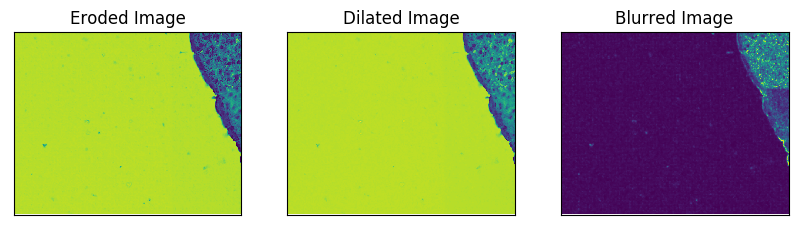

Blocks with tissue:  15
Percent of blocks w/ tissue:  15 %
Blurred blocks w/ tissue:  1
Blurred blocks out of 100:  1 %
Blurred blocks out of blocks w/ tissue:  6 %


In [15]:
img = cv2.imread(img_path+"Images/GImage.tif", 0)
laplacian = cv2.Laplacian(img, cv2.CV_64F)
scale = cv2.convertScaleAbs(laplacian)
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(scale, kernel, iterations=1)
blur = cv2.GaussianBlur(dilation,(5,5),5)

erosion=cv2.erode(img, kernel, iterations=1)
dilation = cv2.dilate(erosion, kernel, iterations=1)
plt.subplot(131), plt.imshow(erosion)
plt.title("Eroded Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(dilation)
plt.title("Dilated Image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(blur)
plt.title("Blurred Image"), plt.xticks([]), plt.yticks([])
plt.show()
total_empty = 0
total_blur = 0
r = dilation.shape[0]/10
c = dilation.shape[1]/10
for i in range(10):
    for j in range(10):
        a = np.std(dilation[i*r:(i+1)*r, j*c:(j+1)*c])
        if a > 15:
            total_empty += 1
            b = np.std(blur[i*r:(i+1)*r, j*c:(j+1)*c])
            if (b < 15):
                total_blur += 1
                
print "Blocks with tissue: ", total_empty
print "Percent of blocks w/ tissue: ", (total_empty*100 )/100 ,"%"
print "Blurred blocks w/ tissue: ", total_blur
print "Blurred blocks out of 100: ",(total_blur*100)/100,"%"
print "Blurred blocks out of blocks w/ tissue: ",(total_blur*100)/total_empty,"%"

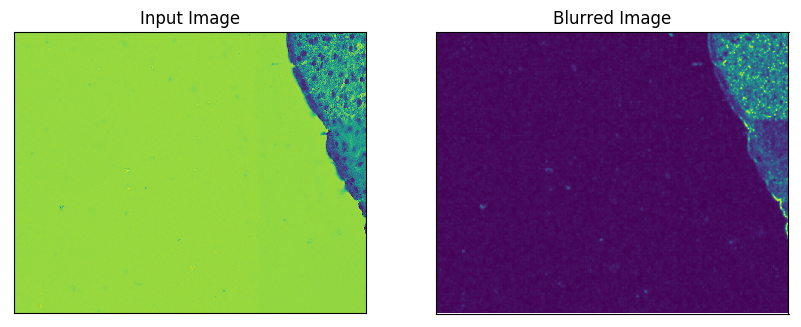

In [16]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
scale = cv2.convertScaleAbs(laplacian)
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(scale, kernel, iterations=1)
blur = cv2.GaussianBlur(dilation,(5,5),5)
plt.subplot(121), plt.imshow(img)
plt.title("Input Image"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur)
plt.title("Blurred Image"), plt.xticks([]), plt.yticks([])
plt.show()


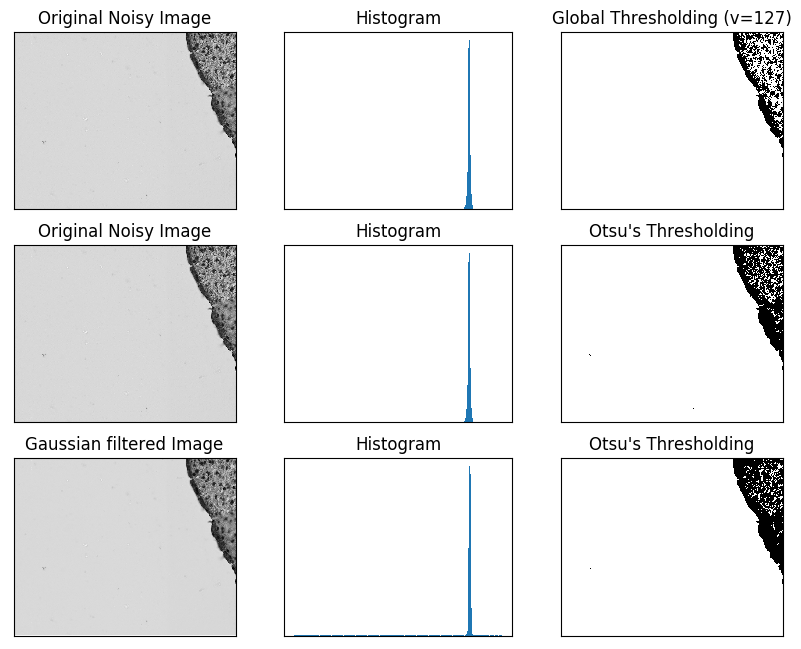

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(img_path+'Images/GImage.tif',0)

# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
 
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
 
# plot all the images and their histograms
images = [img, 0, th1,
           img, 0, th2,
           blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

for i in xrange(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

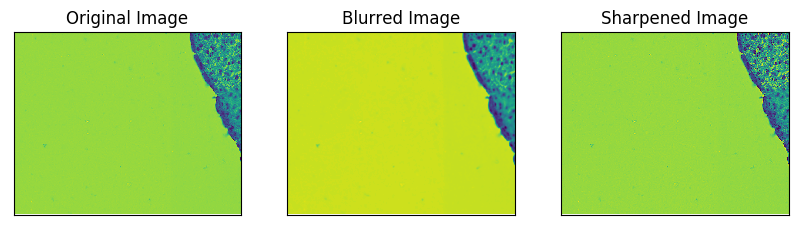

In [20]:
#Image with unsharp masking

image = cv2.GaussianBlur(img, (0,0), 3)
frame = cv2.addWeighted(img, 1.5, image, -0.5, 0)
plt.subplot(131), plt.imshow(img)
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(image)
plt.title("Blurred Image"), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(frame)
plt.title("Sharpened Image"), plt.xticks([]), plt.yticks([])
plt.show()

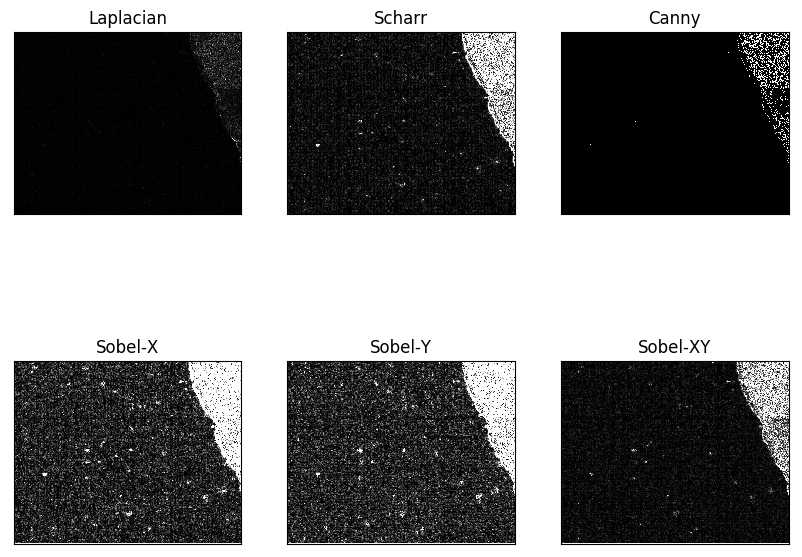

In [21]:
edge2 = cv2.Canny(img, 127, 255)
edge22 = cv2.Sobel(img, cv2.CV_64F,1,0, ksize=5)
scale22 = cv2.convertScaleAbs(edge22)
edge222 = cv2.Sobel(img, cv2.CV_64F,0,1, ksize=5)
scale222 = cv2.convertScaleAbs(edge222)
edge2222 = cv2.Sobel(img, cv2.CV_64F, 1,1, ksize=5)
scale2222 = cv2.convertScaleAbs(edge2222)
edge = cv2.Laplacian(img, cv2.CV_64F)
scale = cv2.convertScaleAbs(edge)
edge1 = cv2.Scharr(img, cv2.CV_64F, 1, 0)
scale1 = cv2.convertScaleAbs(edge1)


plt.subplot(2,3,1), plt.imshow(scale, 'gray')
plt.title("Laplacian"), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2), plt.imshow(scale1, 'gray')
plt.title("Scharr"), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,3), plt.imshow(edge2, 'gray')
plt.title("Canny"), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,4), plt.imshow(scale22, 'gray')
plt.title("Sobel-X"), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,5), plt.imshow(scale222, 'gray')
plt.title("Sobel-Y"), plt.xticks([]), plt.yticks([])
plt.subplot(2,3,6), plt.imshow(scale2222, 'gray')
plt.title("Sobel-XY"), plt.xticks([]), plt.yticks([])
plt.show()